In [2]:
import tensorflow as tf
from PIL import Image
from tensorflow.keras import layers

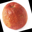

In [28]:
img=Image.open("/home/student/Desktop/PYTHON/G18/stale_apple/rotated_by_15_Screen Shot 2018-06-07 at 2.41.32 PM.png")
img=img.resize((32,32))
img

In [31]:
data=tf.keras.utils.image_dataset_from_directory("/home/student/Desktop/PYTHON/G18/project",
    image_size=(32,32),
    color_mode="rgb",
    batch_size=2342)

Found 2342 files belonging to 2 classes.


In [32]:
for feature,label in data:
    print(feature.shape,label.shape)
    break

2022-12-19 19:27:06.294907: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:392] Filling up shuffle buffer (this may take a while): 888 of 18736
2022-12-19 19:27:16.214118: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:392] Filling up shuffle buffer (this may take a while): 1431 of 18736
2022-12-19 19:27:26.190752: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:392] Filling up shuffle buffer (this may take a while): 1883 of 18736
2022-12-19 19:27:34.215634: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:417] Shuffle buffer filled.


(2342, 32, 32, 3) (2342,)


In [33]:
model=tf.keras.Sequential([
    layers.Conv2D(16,3,input_shape=(32,32,3),activation="leaky_relu"),
    layers.MaxPool2D(),
    layers.Conv2D(32,3,activation="leaky_relu"),
    layers.MaxPool2D(),
    layers.Conv2D(48,3,activation="leaky_relu"),
    layers.MaxPool2D(),
    layers.Flatten(),
    layers.Dense(16,"relu"),
    layers.Dense(2,"softmax")
])

In [34]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 30, 30, 16)        448       
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 15, 15, 16)       0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 13, 13, 32)        4640      
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 6, 6, 32)         0         
 g2D)                                                            
                                                                 
 conv2d_11 (Conv2D)          (None, 4, 4, 48)          13872     
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 2, 2, 48)        

In [35]:
model.compile(loss=tf.keras.losses.categorical_crossentropy,optimizer=tf.keras.optimizers.Adam(),metrics=["accuracy"])

In [36]:
for images,labels in data:
    features=tf.divide(feature,255)
    labels=tf.one_hot(label,2)
    record=model.fit(features,labels,batch_size=10,epochs=50)
    break

2022-12-19 19:28:12.253835: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:392] Filling up shuffle buffer (this may take a while): 927 of 18736
2022-12-19 19:28:17.700597: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:417] Shuffle buffer filled.


Epoch 1/50
235/235 [==============================] - 8s 17ms/step - loss: 0.0117 - accuracy: 0.9974
Epoch 2/50
235/235 [==============================] - 4s 16ms/step - loss: 2.8504e-09 - accuracy: 1.0000
Epoch 3/50
235/235 [==============================] - 4s 17ms/step - loss: 2.8504e-09 - accuracy: 1.0000
Epoch 4/50
235/235 [==============================] - 4s 19ms/step - loss: 2.8504e-09 - accuracy: 1.0000
Epoch 5/50
235/235 [==============================] - 4s 19ms/step - loss: 2.8504e-09 - accuracy: 1.0000
Epoch 6/50
235/235 [==============================] - 4s 16ms/step - loss: 2.8504e-09 - accuracy: 1.0000
Epoch 7/50
235/235 [==============================] - 4s 16ms/step - loss: 2.8504e-09 - accuracy: 1.0000
Epoch 8/50
235/235 [==============================] - 5s 21ms/step - loss: 2.7486e-09 - accuracy: 1.0000
Epoch 9/50
235/235 [==============================] - 4s 18ms/step - loss: 2.6977e-09 - accuracy: 1.0000
Epoch 10/50
235/235 [==============================] - 4s 1

In [38]:
model=model.save("stale_apple.h5",save_format="h5")

In [41]:
model=tf.keras.models.load_model("stale_apple.h5")
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 30, 30, 16)        448       
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 15, 15, 16)       0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 13, 13, 32)        4640      
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 6, 6, 32)         0         
 g2D)                                                            
                                                                 
 conv2d_11 (Conv2D)          (None, 4, 4, 48)          13872     
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 2, 2, 48)        